# Tutorial 4: Integration of heterogeneous-structure datasets

In this tutorial, we utilized three mouse hippocampal slices from Slide-seq to assess the performance of spatiAlign in integrating heterogeneous-structure datasets with distinct biological characteristics.

- ### Import packages

In [1]:
import scanpy as sc
from spatialign import Spatialign
from warnings import filterwarnings
from anndata import AnnData

filterwarnings("ignore")

In [2]:
datasets = [
    "/media/Data/zhangchao/hipp1.h5ad",
    "/media/Data/zhangchao/hipp2.h5ad",
    "/media/Data/zhangchao/hipp3.h5ad"
]

- ### Initialize        
Read datasets and load `spatiAlign` model

In [3]:
model = Spatialign(
    *datasets,
    batch_key='batch',
    is_norm_log=True,
    is_scale=False,
    n_neigh=15,
    is_undirected=True,
    latent_dims=100,
    seed=42,
    gpu=0,
    save_path="./",
    is_verbose=False
)

- ### Training `spatiAlign` model               
`spatiAlign` aims to aligns the biological effects, while maximized preserving spots/cells biological variances in the latent embedding.             
It is possible to fine-tune the parameters (tau1, tau2, tau3) to optimize the model’s performance.

In [4]:
model.train()

- ### Inference alignment datasets          
After model training, the learned lower-dimensional representations will be saved in `adata.obsm[‘correct’]`, and the higher-dimensional representations will be saved in `adata.X`.

In [5]:
model.alignment()

- ### Visualizing inference datasets

In [6]:
correct1 = sc.read_h5ad("./correct0.h5ad")
correct2 = sc.read_h5ad("./correct1.h5ad")
correct3 = sc.read_h5ad("./correct2.h5ad")

In [7]:
merge_data = correct1.concatenate(correct2, correct3)

In [8]:
sc.pp.neighbors(merge_data, use_rep="correct", random_state=42)
sc.tl.umap(merge_data, random_state=42)

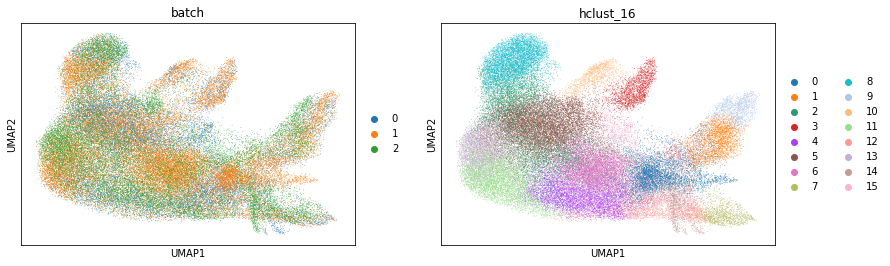

In [9]:
sc.pl.umap(merge_data, color=["batch", "hclust_16"])

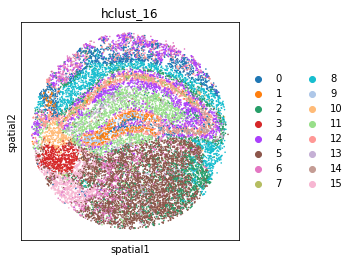

In [10]:
sc.pl.spatial(correct1, spot_size=40, color="hclust_16")

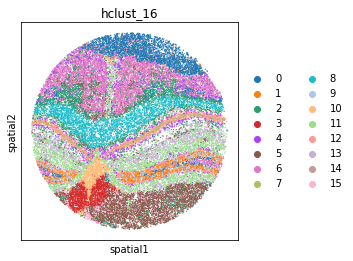

In [11]:
sc.pl.spatial(correct2, spot_size=30, color="hclust_16")

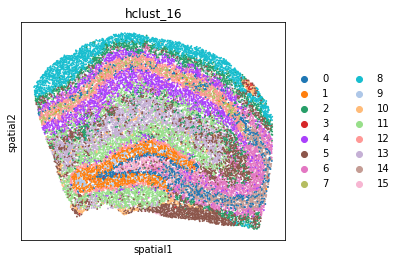

In [12]:
sc.pl.spatial(correct3, spot_size=10, color="hclust_16")